# Support Vector Machines (SVM)

## I. *Classification Support Vector Machines*

###  A. *Linearly Separable SVM*


* Let be the learning data, $\mathcal{D}=\{(\mathbf{\boldsymbol{x}}_i, y_i)\}_{i=1}^n$, $\boldsymbol{x}_i\in\mathbb{R}^p$ and $y_i\in\{-1,1\}$.


* **The aim:** find a *classifier (decision or separating)* function, $f(\boldsymbol{x})$, such that

$$
\mathrm{sign}(f(\boldsymbol{x}))=
\begin{cases}
-1, & f(\boldsymbol{x})< 0\\
+1, & f(\boldsymbol{x})\geq 0.
\end{cases}
$$


* Assume a linear hyperplane:

$$
\{\boldsymbol{x}\colon f(\boldsymbol{x})=\beta_0 + \boldsymbol{x}^\top\boldsymbol{\beta}=0\},
$$

where $\beta_0$ is the *bias*, and $\boldsymbol{\beta}\in\mathbb{R}^p$ is the *weight* vector.

* There are infinite separating hyperplanes. So, which one is the best?


* Let $d_{-}$ be the shortest distance from $f(\boldsymbol{x})$ to the nearest **negative** data point.


* Let $d_{+}$ be the shortest distance from $f(\boldsymbol{x})$ to the nearest **positive** data point.


* Define the **_margin_** of $f(\boldsymbol{x})$ given by

$$
d=d_{-1}+d_{+1}=\frac{2}{\|\boldsymbol{\beta}\|_2}.
$$


* If $\mathcal{D}$ is linearly separable, then exist $\beta_0$ and $\boldsymbol{\beta}$ such that:

$$
\begin{split}
&\beta_0 + \boldsymbol{x}_i^\top\boldsymbol{\beta} \leq-1,\quad \text{if } y_i=-1\\
&\beta_0 + \boldsymbol{x}_i^\top\boldsymbol{\beta}\geq+1,\quad \text{if } y_i=+1.
\end{split}
$$


* It can be written as $y_i(\beta_0 + \boldsymbol{x}_i^\top\boldsymbol{\beta})\geq+1$

<br>
<img src='separable_svm.png' width='500' />

Source: Izenman (2008). *Modern Multivariate Statistical Techniques*. Springer, NY. Linearly separable SVM. Red (blue) points are instances with $y_i=-1$ and $y_i=+1$. The support vectors are those points lying on $H_{-1}$ and $H_{+1}$.

<br>

* The mathematical problem:

$$
\begin{split}
\max_{\beta_0,\ \boldsymbol{\beta}} &\quad\frac{2}{\|\boldsymbol{\beta}\|_2}\\
\mathrm{s.t.}&\quad
y_i(\beta_0 + \boldsymbol{x}_i^\top\boldsymbol{\beta})\geq+1,\quad i=1,\ldots,n.
\end{split}
$$


* Or equivalently:

$$
\begin{split}
\min_{\beta_0,\ \boldsymbol{\beta}} &\quad\frac{1}{2}\|\boldsymbol{\beta}\|_2^2\\
\mathrm{s.t.}&\quad
y_i(\beta_0 + \boldsymbol{x}_i^\top\boldsymbol{\beta})\geq+1,\quad i=1,\ldots,n.
\end{split}
$$



* This problem has associated a dual problem

$$
\begin{split}
\min_{\boldsymbol{\alpha}} &\quad \frac{1}{2}\boldsymbol{\alpha}^\top\boldsymbol{H}\boldsymbol{\alpha}-\boldsymbol{1}^\top\boldsymbol{\alpha}\\
\mathrm{s.t.}&\quad\boldsymbol{\alpha}\geq\boldsymbol{0},\ \boldsymbol{\alpha}^\top\boldsymbol{y}=0,
\end{split}
$$

where $\boldsymbol{H}=\{y_iy_{i'}\left\langle \boldsymbol{x}_i,\boldsymbol{x}_{i'}\right\rangle\}$.

### B. *Linearly Non-Separable SVM*

* However, in the real life applications, there exist **_overlapping instances (misclassification)_**


* The solution is to introduce **_slack_** variables $\xi_i\geq0$ for each $i$ in $\mathcal{D}$. 

<br>
<img src='nonseparable_svm.png' width='500' />

Source: Izenman (2008). *Modern Multivariate Statistical Techniques*. Springer, NY. Linearly non-separable SVM. Red(blue) points are obs. with $y_i=-1$($y_i=+1$). The sv's are points on $H_{-1}$ and $H_{+1}$. $\xi_1$ and $\xi_4$ ($\xi_2$, $\xi_3$ and $\xi_5$) are associated with the red(blue) points that violate $H_{-1}$($H_{+1}$). Points satisfying the constraints have $\xi_i=0$.

<br>

* The $C$-Support Vector Classification ($C$-SVC):

$$
\begin{split}
\min_{\beta_0,\ \boldsymbol{\beta},\ \boldsymbol{\xi}} &\quad\frac{1}{2}\|\boldsymbol{\beta}\|_2^2+C\sum_{i=1}^{n}\xi_i,\qquad\  C>0\\
\mathrm{s.t.}&\quad \xi_i\geq0\\
&\quad 
y_i(\beta_0 + \boldsymbol{x}_i^\top\boldsymbol{\beta}) \geq1-\xi_i,\quad i=1,\ldots,n.
\end{split}
$$


* $C>0$ is a *regularization* parameter that controls the size of $\xi_i$.


* The associated dual problem is given by

$$
\begin{split}
\min_{\boldsymbol{\alpha}} &\quad \frac{1}{2}\boldsymbol{\alpha}^\top\boldsymbol{H}\boldsymbol{\alpha} - \boldsymbol{1}^\top\boldsymbol{\alpha}\\
\mathrm{s.t.}&\quad\boldsymbol{\alpha}^\top\boldsymbol{y}=0,\ \ \boldsymbol{0}\leq\boldsymbol{\alpha}\leq C\boldsymbol{1},
\end{split}
$$

where $\boldsymbol{H}=\{y_iy_{i'}\left\langle \boldsymbol{x}_i,\boldsymbol{x}_{i'}\right\rangle\}$.


* The decision function is given by

$$
\begin{split}
\mathrm{sign}\left(f(\boldsymbol{x})\right)
&=\mathrm{sign}\left(\beta_0 + \boldsymbol{x}^\top\boldsymbol{\beta}\right)\\
&=\mathrm{sign}\left(\beta_0 + \sum_{i=1}^{n} \alpha_iy_i\left\langle \boldsymbol{x}_i,\boldsymbol{x}_{i'}\right\rangle\right).
\end{split}
$$

### C. *Nonlinear Support Vector Machines*

* Let be $\boldsymbol{x}_i\in\mathcal{X}\subset\mathbb{R}^p$, where $\mathcal{X}$ is the input space.


* Assume a **_nonlinear map_**

$$
\Phi\colon\mathcal{X}\subset\mathbb{R}^p \to \mathcal{F},
$$

where $\mathcal{F}$ is known as the **_feature space_**.

<br>

<img src='kernel2.jpg' width='550' />

Source: Schlkopf, B. and Smola, A. (2002). *Learning with Kernels*. The MIT Press, Cambridge, Massachusetts

<br>


* Thus, the *nonlinear* decision function is given by

$$
\mathrm{sign}\left(f(\boldsymbol{x})\right)=\mathrm{sign}\left(\beta_0 + \left\langle\Phi(\boldsymbol{x}),\boldsymbol{\beta}\right\rangle\right)
$$


* $\mathcal{F}$ is treated implicitly via the <font color=red>**_kernel trick_**</font> (without to known the structure of $\mathcal{F}$).


* It is, computing the inner products $\left\langle \Phi(\boldsymbol{x}_i),\Phi(\boldsymbol{x}_{i'})\right\rangle$ in $\mathcal{F}$ through

$$
K\left(\boldsymbol{x}_i,\boldsymbol{x}_{i'} \right) = \left\langle \Phi(\boldsymbol{x}_i),\Phi(\boldsymbol{x}_{i'})\right\rangle,
$$

in $\mathcal{X}$ without to known $\Phi$.


*  $K\colon\mathcal{X}\times\mathcal{X}\to\mathbb{R}$ is called the **_kernel function_**.


* **Some kernel functions:** For $\boldsymbol{x}_i,\boldsymbol{x}_{i'}\in\mathcal{X}\subset\mathbb{R}^p$,

    <br>
    
    * Linear
    
    $$
    K(\boldsymbol{x}_i,\boldsymbol{x}_{i'})= \left\langle \boldsymbol{x}_i,\boldsymbol{x}_{i'}\right\rangle
    $$

    * Polynomial
    
    $$K(\boldsymbol{x}_i,\boldsymbol{x}_{i'})= \left(\gamma\left\langle\boldsymbol{x}_i,\boldsymbol{x}_{i'}\right\rangle+ \vartheta\right)^\varrho,\ \ \gamma>0,\ \varrho\in\mathbb{N},\ \vartheta\geq0$$

    * Gaussian Radial Basis Function

    $$K(\boldsymbol{x}_i,\boldsymbol{x}_{i'})= \exp\left(-\gamma\lVert \boldsymbol{x}_i-\boldsymbol{x}_{i'} \rVert^{2}\right),\ \ \gamma>0$$

    * Laplace Radial Basis Function

    $$K(\boldsymbol{x}_i,\boldsymbol{x}_{i'})= \exp\left(-\gamma\lVert \boldsymbol{x}_i-\boldsymbol{x}_{i'} \rVert\right),\ \ \gamma>0$$

    * Hyperbolic tangent (also sigmoid)
    
    $$K(\boldsymbol{x}_i,\boldsymbol{x}_{i'})= \tanh\left(\gamma\left\langle\boldsymbol{x}_i,\boldsymbol{x}_{i'}\right\rangle + \vartheta\right),\ \ \gamma>0, \ \vartheta<0$$

<br>

* The nonlinear $C$-Support Vector Classification ($C$-SVC):

$$
\begin{split}
\min_{\beta_0,\boldsymbol{\beta},\boldsymbol{\xi}} &\quad\frac{1}{2}\|\boldsymbol{\beta}\|^2+C\sum_{i=1}^{n}\xi_i,\quad C>0\\
\mathrm{s.t.}&\quad \xi_i\geq0\\
&\quad 
y_i\left(\beta_0 + \Phi(\boldsymbol{x}_i)^\top\boldsymbol{\beta}\right)\geq 1-\xi_i,\quad i=1,\ldots,n.
\end{split}
$$


* The dual problem:

$$
\begin{split}
\min_{\boldsymbol{\alpha}} &\quad\frac{1}{2}\boldsymbol{\alpha}^\top\boldsymbol{H}\boldsymbol{\alpha}- \boldsymbol{1}^\top\boldsymbol{\alpha}\\
\mathrm{s.t.}&\quad\boldsymbol{\alpha}^\top\boldsymbol{y}=0,\ \ \boldsymbol{0}\leq\boldsymbol{\alpha}\leq C\boldsymbol{1},
\end{split}
$$

where $\boldsymbol{H}=\{H_{ii'}\}=\{y_iy_{i'}K\left(\boldsymbol{x}_i,\boldsymbol{x}_{i'} \right)\}$.

* The decision function

$$
\begin{split}
\mathrm{sign}\left(f(\boldsymbol{x})\right)&=\mathrm{sign}\left(\beta_0 + \left\langle\Phi(\boldsymbol{x}),\boldsymbol{\beta}\right\rangle\right)\\
&=\mathrm{sign}\left(\beta_0 + \sum_{i=1}^{n} y_i\alpha_i\left\langle \Phi(\boldsymbol{x}),\Phi(\boldsymbol{x}_{i'})\right\rangle\right)\\
&=\mathrm{sign}\left(\beta_0+\sum_{i=1}^ny_i\alpha_iK\left(\boldsymbol{x},\boldsymbol{x}_{i'}\right)\right).
\end{split}
$$


### Artificial data

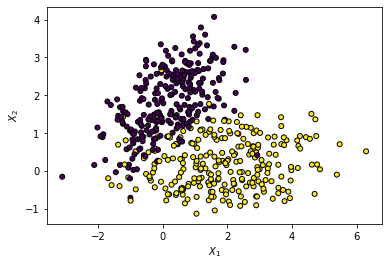

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=500,           # number of instances
                           n_features=2,            # number of features
                           n_informative=2,         # number of informative features
                           n_redundant=0,           # number of redundant features
                           n_classes=2,             # number of classes
                           n_clusters_per_class=1,  # number of clusters per class
                           class_sep=0.8,
                           random_state=77
                          )

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
#X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

#print(X)
#print(y)

### Split into train and test datasets

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

print('Train:', X_train.shape, y_train.shape)
print('Test:',  X_test.shape, y_test.shape)

Train: (350, 2) (350,)
Test: (150, 2) (150,)


### Training

In [109]:
from sklearn import svm

# SVC specification
f = svm.SVC(C=1.0,                          # regularization parameter, C>0
            kernel='linear',                # kernel function: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
#            degree=3,                      # degree of ‘poly’ kernel
#            gamma='scale',                 # gamma coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. 'scale' = gamma = 1 / (n_features * X.var())
#            coef0=0.0,                     # intercept: only for ‘poly’ and ‘sigmoid’.
#            decision_function_shape='ovr', # multiclass classification: one-vs-rest ('ovr') or one-vs-one ('ovo')
            random_state=77
           )

# training
f = f.fit(X_train, y_train)
f

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=77, shrinking=True, tol=0.001,
    verbose=False)

In [110]:
print('No. of support vectors:', f.n_support_)
print('Support vectors:\n', f.support_vectors_)
print('Indices of support vectors:\n', f.support_)
print('y_i * alpha_i:\n', f.dual_coef_)
print('Intercept:', f.intercept_)

No. of support vectors: [35 35]
Support vectors:
 [[-1.44835479 -0.03764051]
 [ 2.92089335  0.41205264]
 [ 0.47002055  1.22539722]
 [ 1.40938887  1.36999224]
 [ 0.91930192  1.34732049]
 [ 0.64565393  1.30080414]
 [-0.90479487  0.02232946]
 [-0.72213607  0.57095791]
 [-0.14623662  0.55608853]
 [-0.17462934  0.24689396]
 [ 0.8062333   1.16075099]
 [-0.30888394  0.55511287]
 [ 1.09758835  1.56082744]
 [-1.04102968  0.16084139]
 [ 1.91890303  1.35181547]
 [ 0.84300198  1.29771151]
 [-0.07004044  0.92659761]
 [-1.00906994 -0.20459466]
 [-0.29295333  0.71029151]
 [ 1.57506928  1.70252602]
 [ 0.47484823  1.1649165 ]
 [ 0.6146858   1.18824299]
 [ 0.46736256  0.70445839]
 [ 0.60047771  0.77299647]
 [-1.31995691  0.1544179 ]
 [ 2.21329004  1.58690262]
 [ 1.44714015  1.72615636]
 [ 0.30627717  1.00796147]
 [-0.53442686  0.37824489]
 [ 0.42987991  1.12286906]
 [-0.93648079  0.31826447]
 [ 1.05398043  1.46540705]
 [-0.69099702  0.59000874]
 [ 0.51040767  0.83703521]
 [-0.99627822 -0.71404067]
 [ 0.

### Plot (only for two features!)

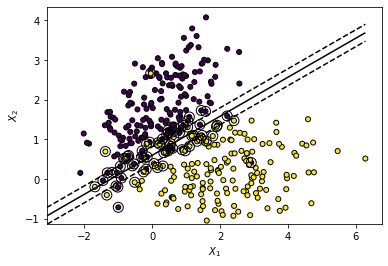

In [111]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
## plot the decision function
# create grid to evaluate model
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = f.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
# plot decision boundary and margins
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
# plot support vectors
plt.scatter(f.support_vectors_[:, 0], f.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### Accuracy

Accuracy: 0.9533333333333334
Confusion Matrix: [[70  1]
 [ 6 73]]


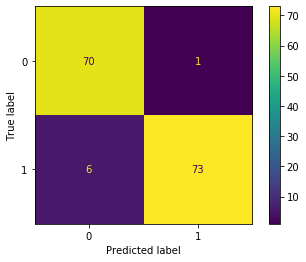

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.99      0.92      0.95        79

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150



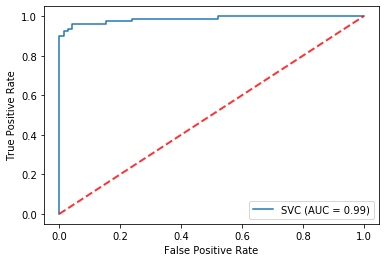

0.9549830629345695

In [112]:
from sklearn import metrics
import matplotlib.pyplot as plt

# prediction
y_pred = f.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_test, y_pred))
metrics.plot_confusion_matrix(f, X_test, y_test)
plt.show()
print(metrics.classification_report(y_test, y_pred))
#print(metrics.roc_curve(y_test, y_pred))
metrics.plot_roc_curve(f, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.show()
metrics.roc_auc_score(y_test, y_pred)

### Tuning hyperparameter

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

f = svm.SVC(C=1.0,               # regularization parameter
            kernel='rbf',        # kernel function: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
            gamma='scale',       # gamma coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
            random_state=77
           )

# define grid search
gamma = [0.01, 0.05, 0.3, 0.5, 1, 10, 100]
C = [1, 10, 80, 100, 200, 500, 1000, 1500]
grid = dict(gamma=gamma, C=C)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(estimator=f, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.937143 using {'C': 80, 'gamma': 0.01}
0.925714 with: {'C': 1, 'gamma': 0.01}
0.931429 with: {'C': 1, 'gamma': 0.05}
0.928571 with: {'C': 1, 'gamma': 0.3}
0.931429 with: {'C': 1, 'gamma': 0.5}
0.928571 with: {'C': 1, 'gamma': 1}
0.888571 with: {'C': 1, 'gamma': 10}
0.834286 with: {'C': 1, 'gamma': 100}
0.934286 with: {'C': 10, 'gamma': 0.01}
0.925714 with: {'C': 10, 'gamma': 0.05}
0.934286 with: {'C': 10, 'gamma': 0.3}
0.931429 with: {'C': 10, 'gamma': 0.5}
0.917143 with: {'C': 10, 'gamma': 1}
0.894286 with: {'C': 10, 'gamma': 10}
0.845714 with: {'C': 10, 'gamma': 100}
0.937143 with: {'C': 80, 'gamma': 0.01}
0.934286 with: {'C': 80, 'gamma': 0.05}
0.922857 with: {'C': 80, 'gamma': 0.3}
0.925714 with: {'C': 80, 'gamma': 0.5}
0.920000 with: {'C': 80, 'gamma': 1}
0.882857 with: {'C': 80, 'gamma': 10}
0.845714 with: {'C': 80, 'gamma': 100}
0.937143 with: {'C': 100, 'gamma': 0.01}
0.931429 with: {'C': 100, 'gamma': 0.05}
0.920000 with: {'C': 100, 'gamma': 0.3}
0.928571 with: {'C': 10

### Prediction

In [114]:
import numpy as np

f = svm.SVC(C=80,                # regularization parameter
            kernel='rbf',        # kernel function: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
#            degree=3,           # degree of ‘poly’ kernel
            gamma=0.01,          # gamma coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
#            coef0=0.0,          # intercept: only for ‘poly’ and ‘sigmoid’.
            random_state=77
           )

# training
f = f.fit(X_train, y_train)
f

# prediction
y_pred = f.predict(X_test)

#np.concatenate((y_test.reshape(y_test.shape[0],1), y_pred.reshape(y_pred.shape[0],1)), axis=1)

### Plot

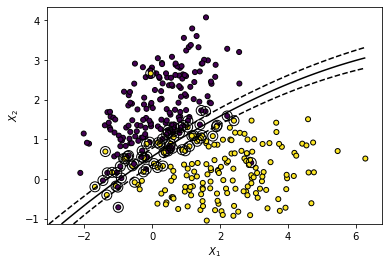

In [115]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
## plot the decision function
# create grid to evaluate model
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = f.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
# plot decision boundary and margins
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
# plot support vectors
plt.scatter(f.support_vectors_[:, 0], f.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### Prediction accuracy

Accuracy: 0.9466666666666667
Confusion Matrix: [[70  1]
 [ 7 72]]


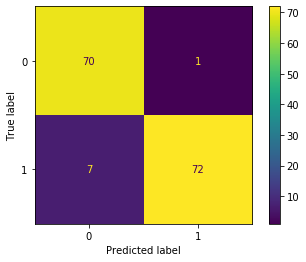

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        71
           1       0.99      0.91      0.95        79

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



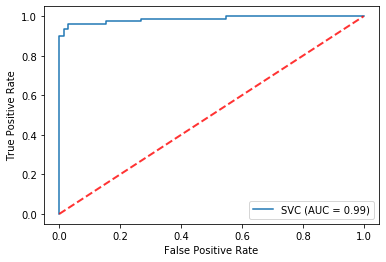

0.9486539490105188

In [116]:
from sklearn import metrics
import matplotlib.pyplot as plt

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_test, y_pred))
metrics.plot_confusion_matrix(f, X_test, y_test)
plt.show()
print(metrics.classification_report(y_test, y_pred))
#print(metrics.roc_curve(y_test, y_pred))
metrics.plot_roc_curve(f, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.show()
metrics.roc_auc_score(y_test, y_pred)

**Exercise:** Apply SVC to the Mushroom data.

## B. *Regression Support Vector Machines*

* A regression analogue for the margin is proposed by a **_tube_** around the regression function $f(\boldsymbol{x})$ that contains most of the points.


* It is, by defining a $\epsilon$-**_insensitive loss function_**

$$
|y- f(\boldsymbol{x})|_\epsilon = \max\left\lbrace 0, |y - f(\boldsymbol{x})| -\epsilon  \right\rbrace,\quad \epsilon>0
$$


* It ignores errors associated with points falling within a distance $\epsilon>0$ of the true regression model:

    <br>
    
    * If $(\boldsymbol{x},y)$ is such that $|y-f(\boldsymbol{x})|\leq \epsilon$, the loss is taken to be zero.
    
    <br>
    
    * If $(\boldsymbol{x},y)$ is such that $|y-f(\boldsymbol{x})|> \epsilon$ the loss is $|y-f(\boldsymbol{x})|- \epsilon$.


* The usual value for $\epsilon$ is taken around 0.1.
   
   
* **Examples of $\epsilon$-insensitive loss functions**
    
    <br>
    
    * Linear:

    $$L_1^\epsilon(y,f(\boldsymbol{x}))=\max\{0,|y-f(\boldsymbol{x})|- \epsilon\}$$

    * Quadratic:

    $$L_2^\epsilon(y,f(\boldsymbol{x}))=\max\{0,(y-f(\boldsymbol{x}))^2- \epsilon\}$$

    * Huber:

    $$L_H^\epsilon(y,f(\boldsymbol{x}))=\max\left\lbrace \frac{1}{2}(y-f(\boldsymbol{x}))^2,\epsilon|y-f(\boldsymbol{x})|-\frac{\epsilon^2}{2}\right\rbrace$$


* Define **_slack variables_**:

    <br>
    
    * $\xi_i = y_i -f(\boldsymbol{x}_i) - \epsilon\geq 0$ if $(\boldsymbol{x}_i,y_i)$ lies **_above_** the $\epsilon$-tube.
    
    <br>
    
    * $\xi'_i = f(\boldsymbol{x}_i) - y_i - \epsilon\geq 0$ if $(\boldsymbol{x}_i,y_i)$ lies **_below_** the $\epsilon$-tube.


<br>

<img src='svm_reg2.png' width='350' />

Source: Hamel (2009). *Knowledge Discovery with Support Vector Machines*. Wiley, New Jersey. Linear maximum margin regression with slack variables.

<br>

* The primal problem

$$
\begin{split}
\min_{\beta_0,\boldsymbol{\beta},\boldsymbol{\xi},\boldsymbol{\xi}'} &\quad\frac{1}{2}\|\boldsymbol{\beta}\|_2^2+C\sum_{i=1}^{n}(\xi_i+\xi'_i)\\
\mathrm{subject}\ \mathrm{to}&\quad \xi_i\geq0,\ \xi'_i\geq 0,\\
&\quad y_i-\left(\beta_0 + \left\langle\Phi(\boldsymbol{x}),\boldsymbol{\beta}\right\rangle\right)\leq \epsilon+\xi_i,\\
&\quad \left(\beta_0 + \left\langle\Phi(\boldsymbol{x}),\boldsymbol{\beta}\right\rangle\right)-y_i \leq \epsilon+\xi'_i,\quad i=1,\ldots,n.
\end{split}
$$

* The dual problem

$$
\begin{split}
\min_{\boldsymbol{\alpha},\boldsymbol{\alpha}'} &\quad\frac{1}{2}(\boldsymbol{\alpha}-\boldsymbol{\alpha}')^\top\boldsymbol{K}(\boldsymbol{\alpha}-\boldsymbol{\alpha}')-(\boldsymbol{\alpha}-\boldsymbol{\alpha}')^\top\boldsymbol{y}+\epsilon(\boldsymbol{\alpha}+\boldsymbol{\alpha}')^\top\boldsymbol{1}_n\\
\mathrm{s.t.}&\quad\boldsymbol{0}\leq\boldsymbol{\alpha},\boldsymbol{\alpha}'\leq C\boldsymbol{1}_n\\
&\quad (\boldsymbol{\alpha}-\boldsymbol{\alpha}')^\top\boldsymbol{1}_n=0,
\end{split}
$$

where $K\left(\boldsymbol{x}_i,\boldsymbol{x}_{i'} \right) = \left\langle \Phi(\boldsymbol{x}_i),\Phi(\boldsymbol{x}_{i'})\right\rangle$.

* The regression equation

$$
\begin{split}
f(\boldsymbol{x})
&=\beta_0+\left\langle\Phi(\boldsymbol{x}),\boldsymbol{\beta}\right\rangle\\
&=\beta_0+\sum_{i=1}^n(\alpha_i-\alpha'_i)K\left(\boldsymbol{x},\boldsymbol{x}_{i'}\right).
\end{split}
$$

### Load data

In [41]:
from numpy import loadtxt
data = loadtxt('prostate.txt', delimiter='\t')
#print(data)  # print objects
data.shape   # data dimension

(97, 9)

### Split into train and test datasets

In [42]:
from sklearn.model_selection import train_test_split

X = data[:,0:7]
y = data[:,8]
#y = y.values.reshape((len(y), 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

print('Train:', X_train.shape, y_train.shape)
print('Test:',  X_test.shape, y_test.shape)

Train: (67, 7) (67,)
Test: (30, 7) (30,)


### Training

In [43]:
from sklearn import svm

# SVR specification
f = svm.SVR(kernel='rbf',    # kernel function: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
            degree=3,        # degree of ‘poly’ kernel
            gamma='scale',   # gamma coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. gamma='scale' = 1 / (n_features * X.var()) 
            coef0=0.0,       # intercept: only for ‘poly’ and ‘sigmoid’.
            tol=0.001,       # tolerance for stopping criterion
            C=1.0,           # regularization parameter
            epsilon=0.1,     # epsilon in the epsilon-SVR model
            shrinking=True,
            cache_size=200, 
            verbose=False,
            max_iter=-1
           )

# training
f = f.fit(X_train, y_train)
f

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
print('No. of support vectors:', f.n_support_)
print('Support vectors:\n', f.support_vectors_)
print('Indices of support vectors:\n', f.support_)
print('(alpha_i - alpha*_i):\n', f.dual_coef_)     # (alpha_i - alpha'_i) of the support vector in the decision function
print('Intercept:', f.intercept_)

No. of support vectors: [63]
Support vectors:
 [[ 2.19833507e+00  4.05091500e+00  7.20000000e+01  2.30757263e+00
   0.00000000e+00 -4.30782920e-01  7.00000000e+00]
 [ 2.53765721e+00  4.35478400e+00  7.80000000e+01  2.32630162e+00
   0.00000000e+00 -1.38629436e+00  7.00000000e+00]
 [ 2.02419307e+00  3.73169900e+00  5.80000000e+01  1.63899671e+00
   0.00000000e+00 -1.38629436e+00  6.00000000e+00]
 [ 6.93147181e-01  3.53950900e+00  5.80000000e+01  1.53686722e+00
   0.00000000e+00 -1.38629436e+00  6.00000000e+00]
 [ 3.30284926e+00  3.51898000e+00  6.40000000e+01 -1.38629436e+00
   1.00000000e+00  2.32727771e+00  7.00000000e+00]
 [ 5.12823626e-01  3.63363100e+00  6.40000000e+01  1.49290410e+00
   0.00000000e+00  4.87901600e-02  7.00000000e+00]
 [ 2.53290285e+00  3.67756600e+00  6.10000000e+01  1.34807315e+00
   1.00000000e+00 -1.38629436e+00  7.00000000e+00]
 [ 2.23143551e-01  3.24454400e+00  6.30000000e+01 -1.38629436e+00
   0.00000000e+00 -1.38629436e+00  6.00000000e+00]
 [ 2.01089500e+00

### Accuracy

Mean absolute error: 0.7405019132012883
Mean squared error: 0.8921471378030658
Correlation: 0.3659700734859915


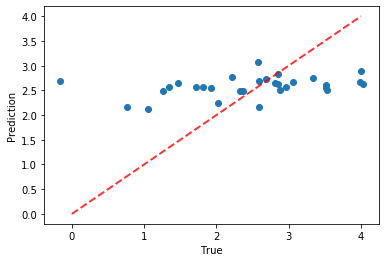

In [45]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = f.predict(X_test)

print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:',  metrics.mean_squared_error(y_test, y_pred))

print('Correlation:', np.corrcoef(y_test, y_pred)[0,1])

plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0,4), np.linspace(0,4), linestyle='--', lw=2, color='r', alpha=.8)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

### Tuning hyperparameter

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

f = svm.SVR(kernel='rbf')

# define grid search
gamma = [0.01, 0.05, 0.5, 1, 10, 100]
C = [1, 10, 80, 100, 200, 500, 1000, 1500]
grid = dict(gamma=gamma, C=C)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(estimator=f, param_grid=grid, n_jobs=-1, cv=kfold, scoring='neg_root_mean_squared_error')
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: -0.732694 using {'C': 100, 'gamma': 0.01}
-0.878803 with: {'C': 1, 'gamma': 0.01}
-0.904228 with: {'C': 1, 'gamma': 0.05}
-1.000318 with: {'C': 1, 'gamma': 0.5}
-1.060723 with: {'C': 1, 'gamma': 1}
-1.126208 with: {'C': 1, 'gamma': 10}
-1.155202 with: {'C': 1, 'gamma': 100}
-0.749462 with: {'C': 10, 'gamma': 0.01}
-0.921874 with: {'C': 10, 'gamma': 0.05}
-0.939429 with: {'C': 10, 'gamma': 0.5}
-1.020595 with: {'C': 10, 'gamma': 1}
-1.094325 with: {'C': 10, 'gamma': 10}
-1.157193 with: {'C': 10, 'gamma': 100}
-0.733291 with: {'C': 80, 'gamma': 0.01}
-1.090694 with: {'C': 80, 'gamma': 0.05}
-0.939429 with: {'C': 80, 'gamma': 0.5}
-1.020595 with: {'C': 80, 'gamma': 1}
-1.094325 with: {'C': 80, 'gamma': 10}
-1.157193 with: {'C': 80, 'gamma': 100}
-0.732694 with: {'C': 100, 'gamma': 0.01}
-1.090834 with: {'C': 100, 'gamma': 0.05}
-0.939429 with: {'C': 100, 'gamma': 0.5}
-1.020595 with: {'C': 100, 'gamma': 1}
-1.094325 with: {'C': 100, 'gamma': 10}
-1.157193 with: {'C': 100, 'gamma': 1

### Prediction

In [48]:
f = svm.SVR(kernel='rbf',    # kernel function: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
#            degree=3,        # degree of ‘poly’ kernel
            gamma=0.01,   # gamma coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
#            coef0=0.0,       # intercept: only for ‘poly’ and ‘sigmoid’.
#            tol=0.001,       # tolerance for stopping criterion
            C=100,           # regularization parameter
            epsilon=0.1,     # epsilon in the epsilon-SVR model
           )

# training
f = f.fit(X_train, y_train)

# prediction
y_pred = f.predict(X_test)

np.concatenate((y_test.reshape(y_test.shape[0],1), y_pred.reshape(y_pred.shape[0],1)), axis=1)

array([[ 2.8535925 ,  3.81160202],
       [ 2.3749058 ,  2.10354791],
       [ 2.5915164 ,  1.97581055],
       [ 1.2669476 ,  2.21649977],
       [ 3.5160131 ,  2.20983655],
       [ 2.6912431 ,  3.24288249],
       [ 2.5687881 ,  3.28332002],
       [ 1.4701758 ,  1.57278174],
       [ 3.3375474 ,  4.46511374],
       [ 1.047319  ,  0.54468698],
       [ 3.993603  ,  3.30754982],
       [ 2.2137539 ,  4.93501304],
       [ 4.029806  ,  2.61156108],
       [ 0.7654678 , -0.74151751],
       [ 2.5915164 ,  2.42450412],
       [ 2.0215476 , -0.0953749 ],
       [ 3.9843437 ,  3.85405416],
       [ 2.8535925 ,  2.95216022],
       [ 2.9626924 ,  1.52535773],
       [ 1.7137979 ,  2.44424454],
       [ 1.9242487 ,  1.8887542 ],
       [ 3.5130369 ,  2.49127383],
       [ 1.3480731 ,  2.23870449],
       [ 2.8063861 ,  2.48243247],
       [ 2.8820035 ,  1.7606237 ],
       [ 2.3272777 ,  2.35057698],
       [ 3.5307626 ,  3.11967055],
       [ 3.0563569 ,  3.24582022],
       [-0.1625189 ,

### Prediction Accuracy

Mean absolute error: 0.8243237421482204
Mean squared error: 1.1829088212276746
Correlation: 0.5044719502393978


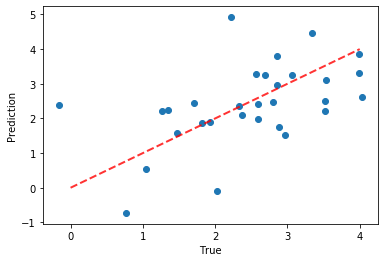

In [49]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:',  metrics.mean_squared_error(y_test, y_pred))

print('Correlation:', np.corrcoef(y_test, y_pred)[0,1])

plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0,4), np.linspace(0,4), linestyle='--', lw=2, color='r', alpha=.8)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()